# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it.

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16).
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [25]:
import random

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f'{self.rank}{self.suit}'

class Deck:
    suits = ["♠", "♡", "♢", "♣"]
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, num_decks=6):
        self.cards = []
        for i in range(num_decks):
            for suit in self.suits:
                for rank in self.ranks:
                    card = Card(suit, rank)
                    self.cards.append(card)
                random.shuffle(self.cards)

    def deal_card(self):
        return self.cards.pop()

    def get_num_cards(self):
        return len(self.cards)

In [19]:
deck=Deck()
deck.cards

[A♡,
 5♡,
 Q♡,
 8♡,
 K♠,
 Q♠,
 10♢,
 9♠,
 3♡,
 3♡,
 7♢,
 J♠,
 2♣,
 9♣,
 8♣,
 2♣,
 9♢,
 2♣,
 Q♢,
 8♡,
 A♢,
 K♡,
 5♣,
 3♠,
 8♢,
 A♠,
 5♢,
 5♡,
 2♠,
 8♣,
 K♢,
 5♢,
 4♡,
 5♠,
 3♠,
 8♠,
 9♡,
 2♣,
 10♢,
 9♣,
 7♡,
 3♡,
 2♡,
 K♣,
 9♠,
 7♠,
 10♠,
 K♡,
 3♣,
 2♣,
 K♡,
 A♣,
 4♠,
 6♢,
 4♣,
 2♠,
 K♡,
 J♣,
 7♠,
 10♢,
 J♠,
 3♣,
 Q♢,
 8♢,
 7♡,
 J♠,
 10♣,
 10♣,
 8♡,
 6♡,
 J♡,
 10♢,
 5♠,
 2♣,
 5♣,
 J♣,
 4♠,
 2♠,
 10♡,
 Q♢,
 6♣,
 K♠,
 2♡,
 A♢,
 4♢,
 7♢,
 A♡,
 6♠,
 A♣,
 10♠,
 6♠,
 J♢,
 4♣,
 Q♠,
 9♡,
 8♠,
 6♡,
 6♡,
 9♣,
 Q♣,
 5♠,
 K♢,
 10♠,
 J♢,
 K♣,
 3♢,
 2♢,
 A♢,
 3♣,
 5♡,
 Q♢,
 4♣,
 6♢,
 4♣,
 K♠,
 Q♠,
 K♣,
 K♣,
 10♢,
 4♡,
 8♠,
 7♣,
 10♢,
 K♢,
 J♢,
 3♠,
 6♠,
 6♠,
 Q♡,
 2♠,
 K♡,
 9♠,
 7♡,
 Q♠,
 6♣,
 5♠,
 8♢,
 6♣,
 4♡,
 9♠,
 2♢,
 2♢,
 2♡,
 J♣,
 3♡,
 4♠,
 6♢,
 5♡,
 7♣,
 2♠,
 3♢,
 J♢,
 8♠,
 A♣,
 A♠,
 9♡,
 9♢,
 7♡,
 4♡,
 3♡,
 8♢,
 7♢,
 J♡,
 J♡,
 Q♠,
 Q♡,
 6♢,
 2♡,
 2♡,
 K♣,
 Q♣,
 A♢,
 6♣,
 5♡,
 K♢,
 K♠,
 7♣,
 7♣,
 3♣,
 K♣,
 3♠,
 Q♣,
 4♠,
 4♠,
 J♡,
 J♠,
 A♡,
 7♢,
 10♠,
 2♢,
 3♢,
 Q♠,
 4♢,
 8♠,
 4♢,
 8♢,
 A♡,
 9

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook.

 ___________________             _____________________
|    Game           |           |        Deck         |
|-------------------|           |---------------------|
| -deck : List[Card]|           | -cards : List[Card] |
| -players : List[Player]|      | -suites : List[str] |
| -dealer : Dealer   |          | -ranks : List[str]  |
|-------------------|           |---------------------|
| +start_game()     |           | +shuffle()          |
| +end_game()       |           | +deal_card() -> Card|
| +hit(player)      |           | +shuffle()          |
| +stand(player)    |           |_____________________|
|___________________|

 ___________________             
|      Player       |           
|-------------------|  
| -hand : List[Card] |  
| -name : str       |  
|-------------------|  
| +__init__(name: str)|  
| +hit(card: Card)   |  
| +stand()           |  
|___________________|  

 ___________________   
|      Dealer       |  
|-------------------|  
| -hand : List[Card] |  
| -name : str       |  
|-------------------|  
| +__init__(name: str)|  
| +hit(card: Card)  |  
| +stand()          |  
|___________________|  

 ___________________   
|       Card        |  
|-------------------|  
| -rank : str       |  
| -suite : str      |  
|-------------------|  
| +__init__(rank: str, suite: str)|  
| +get_value() -> int|  
|___________________|  

 ___________________   
|       Hand        |  
|-------------------|  
| -cards : List[Card]|  
|-------------------|  
| +add_card(card: Card) |  
| +get_value() -> int|  
|___________________|  

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [20]:
class Card:
    def __init__(self, suit, rank):
        pass

    def __repr__(self):
        pass


class Deck:
    def __init__(self, num_decks=1):
        pass

    def deal_card(self):
        pass


class Hand:
    def __init__(self):
        pass

    def add_card(self, card):
        pass

    def __repr__(self):
        pass


class Player:
    def __init__(self, chips, strategy):
        pass

    def make_decision(self, hand, upcard, shown_cards):
        pass

    def place_bet(self):
        pass


class HumanPlayer(Player):
    def __init__(self, chips):
        pass

    def make_decision(self, hand, upcard, shown_cards):
        pass

    def place_bet(self):
        pass


class ComputerPlayer(Player):
    def make_decision(self, hand, upcard, shown_cards):
        pass

    def place_bet(self):
        pass


class Game:
    def __init__(self, players, num_decks=1):
        pass

    def play_round(self):
        pass


4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [21]:
class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def get_score(self):
        score = 0
        aces = 0
        for card in self.cards:
            if card.rank in ['J', 'Q', 'K']:
                score += 10
            elif card.rank == 'A':
                aces += 1
                score += 11
            else:
                score += int(card.rank)

        while score > 21 and aces > 0:
            score -= 10
            aces -= 1

        return score

    def is_bust(self):
        return self.get_score() > 21

    def __repr__(self):
        return ', '.join(str(card) for card in self.cards)


In [22]:
class Player:
    def __init__(self, chips, strategy=None):
        self.chips = chips
        self.strategy = strategy

    def make_decision(self, hand, upcard, shown_cards):
        pass

    def place_bet(self):
        pass


class HumanPlayer(Player):
    def __init__(self, chips):
        super().__init__(chips)
        self.quiet = False


    def make_decision(self, hand, upcard, shown_cards):
        print(f'Your hand: {hand}')
        print(f'Dealer upcard: {upcard}')
        decision = input('Enter "h" to hit or "s" to stand: ').lower()
        while decision not in ['h', 's']:
            decision = input('Invalid input. Enter "h" to hit or "s" to stand: ').lower()
        return decision

    def place_bet(self):
        bet = int(input(f'You have {self.chips} chips. Enter your bet: '))
        while bet <= 0 or bet > self.chips:
            bet = int(input('Invalid bet. Enter a valid bet: '))
        self.chips -= bet
        return bet


class ComputerPlayer(Player):
    def make_decision(self, hand, upcard, shown_cards):
        # Basic strategy: hit until 17
        if hand.get_score() < 17:
            return 'h'
        else:
            return 's'

    def place_bet(self):
        bet = min(100, self.chips)
        self.chips -= bet
        return bet

In [23]:
class Game:
    def __init__(self, num_players, quiet=False):
        self.players = [ComputerPlayer(1000) for _ in range(num_players - 1)] + [HumanPlayer(1000)]
        self.players[-1].quiet = quiet
        self.dealer = Player(0)
        self.deck = Deck()
        self.hands = {}
        self.shown_cards = []
        self.bets = {}
        self.quiet = quiet

    def play_round(self):
        if self.deck.get_num_cards() < 15:
            self.deck = Deck()
        if not self.quiet:
            print('Shuffling the deck.')

        self.hands.clear()
        self.shown_cards.clear()
        self.bets.clear()

        for player in self.players:
            bet = player.place_bet()
            self.bets[player] = bet

        for player in self.players + [self.dealer]:
            hand = Hand()
            hand.add_card(self.deck.deal_card())
            hand.add_card(self.deck.deal_card())
            self.hands[player] = hand

        for player in self.players:
            while True:
                decision = player.make_decision(self.hands[player], self.hands[self.dealer].cards[0], self.shown_cards)
                if decision == 'h':
                    card = self.deck.deal_card()
                    self.hands[player].add_card(card)
                    self.shown_cards.append(card)
                else:
                    break

        while self.hands[self.dealer].get_score() < 17:
            card = self.deck.deal_card()
            self.hands[self.dealer].add_card(card)
            self.shown_cards.append(card)

        for player in self.players:
            player_hand = self.hands[player]
            dealer_hand = self.hands[self.dealer]
            bet = self.bets[player]

            if player_hand.is_bust():
                print(f'{type(player).__name__} busts with {player_hand} and loses {bet} chips')
            elif dealer_hand.is_bust() or player_hand.get_score() > dealer_hand.get_score():
                print(f'{type(player).__name__} wins with {player_hand} against dealer {dealer_hand} and wins {bet} chips')
                player.chips += bet * 2
            elif player_hand.get_score() == dealer_hand.get_score():
                print(f'{type(player).__name__} pushes with {player_hand} against dealer {dealer_hand}')
                player.chips += bet
            else:
                print(f'{type(player).__name__} loses with {player_hand} against dealer {dealer_hand} and loses {bet} chips')


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [26]:
def main():
    num_players = 6
    game = Game(num_players)
    while True:
        game.play_round()
        play_again = input('Do you want to play again? (y/n): ').lower()
        if play_again != 'y':
            break

if __name__ == '__main__':
    main()

Shuffling the deck.
You have 1000 chips. Enter your bet: 200
Your hand: 3♢, J♠
Dealer upcard: 5♠
Enter "h" to hit or "s" to stand: h
Your hand: 3♢, J♠, 8♠
Dealer upcard: 5♠
Enter "h" to hit or "s" to stand: s
ComputerPlayer wins with Q♡, Q♠ against dealer 5♠, 4♠, 8♠ and wins 100 chips
ComputerPlayer wins with J♢, Q♣ against dealer 5♠, 4♠, 8♠ and wins 100 chips
ComputerPlayer wins with 9♢, A♠ against dealer 5♠, 4♠, 8♠ and wins 100 chips
ComputerPlayer pushes with 7♡, K♣ against dealer 5♠, 4♠, 8♠
ComputerPlayer busts with 8♡, 3♠, 4♣, 9♡ and loses 100 chips
HumanPlayer wins with 3♢, J♠, 8♠ against dealer 5♠, 4♠, 8♠ and wins 200 chips
Do you want to play again? (y/n): n


6. Implement a new player with the following strategy:

    * Assign each card a value:
        * Cards 2 to 6 are +1
        * Cards 7 to 9 are 0
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [27]:
class CountingPlayer(Player):
    def __init__(self, chips, threshold):
        super().__init__(chips)
        self.threshold = threshold

    def card_value(self, card):
        if card.rank in ['2', '3', '4', '5', '6']:
            return 1
        elif card.rank in ['7', '8', '9']:
            return 0
        else:
            return -1


    def make_decision(self, hand, upcard, shown_cards, num_decks):
        running_count = sum([self.card_value(card) for card in shown_cards])
        true_count = running_count / num_decks
        if hand.get_score() < 12 or (hand.get_score() < 17 and true_count < self.threshold):
            return 'h'
        else:
            return 's'

    def place_bet(self):
        bet = min(100, self.chips)
        self.chips -= bet
        return bet

In [28]:
class Player:
    def __init__(self, chips, strategy=None):
        self.chips = chips
        self.strategy = strategy

    def make_decision(self, hand, upcard, shown_cards):
        pass

    def place_bet(self, *args, **kwargs):
        pass

class ComputerPlayer(Player):
    def make_decision(self, hand, upcard, shown_cards, num_decks):
        if hand.get_score() < 17:
            return 'h'
        else:
            return 's'

    def place_bet(self, shown_cards=None):
        bet = min(100, self.chips)
        self.chips -= bet
        return bet

class HumanPlayer(Player):
    def __init__(self, chips):
        super().__init__(chips)
        self.quiet = False

    def make_decision(self, hand, upcard, shown_cards, num_decks):
        if not self.quiet:
            print(f'Your hand: {hand}')
            print(f'Dealer upcard: {upcard}')
        decision = input('Enter "h" to hit or "s" to stand: ').lower() if not self.quiet else 's'
        while decision not in ['h', 's']:
            decision = input('Invalid input. Enter "h" to hit or "s" to stand: ').lower()
        return decision

    def place_bet(self):
        bet = int(input(f'You have {self.chips} chips. Enter your bet: ')) if not self.quiet else 100
        while bet <= 0 or bet > self.chips:
            bet = int(input('Invalid bet. Enter a valid bet: '))
        self.chips -= bet
        return bet

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [29]:
class Game:
    def __init__(self, num_players, quiet=True):
        self.deck = Deck()
        random.shuffle(self.deck.cards)  # Shuffle the deck
        self.players = [ComputerPlayer(1000) for _ in range(num_players - 1)] + [CountingPlayer(1000, 2)]
        self.dealer = ComputerPlayer(0)
        self.hands = {}
        self.shown_cards = []
        self.bets = {}
        self.quiet = quiet

    def play_round(self):
        if self.deck.get_num_cards() < 52:  # If the deck has less than 52 cards, reshuffle
            self.deck = Deck()
            random.shuffle(self.deck.cards)  # Shuffle the deck
            self.shown_cards = []

        self.hands.clear()
        self.shown_cards.clear()
        self.bets.clear()

        for player in self.players:
            bet = player.place_bet()
            self.bets[player] = bet

        for player in self.players + [self.dealer]:
            hand = Hand()
            hand.add_card(self.deck.deal_card())
            hand.add_card(self.deck.deal_card())
            self.hands[player] = hand

        num_decks = max(1, self.deck.get_num_cards() // 52)

        for player in self.players:
            while True:
                decision = player.make_decision(self.hands[player], self.hands[self.dealer].cards[0], self.shown_cards, num_decks)
                if decision == 'h':
                    card = self.deck.deal_card()
                    self.hands[player].add_card(card)
                    self.shown_cards.append(card)
                else:
                    break

        while self.hands[self.dealer].get_score() < 17:
            card = self.deck.deal_card()
            self.hands[self.dealer].add_card(card)
            self.shown_cards.append(card)

        for player in self.players:
            player_hand = self.hands[player]
            dealer_hand = self.hands[self.dealer]
            bet = self.bets[player]

            if player_hand.is_bust():
                if not self.quiet:
                    print(f'{type(player).__name__} busts with {player_hand} and loses {bet} chips')
            elif dealer_hand.is_bust() or player_hand.get_score() > dealer_hand.get_score():
                if not self.quiet:
                    print(f'{type(player).__name__} wins with {player_hand} against dealer {dealer_hand} and wins {bet} chips')
                player.chips += bet * 2
            elif player_hand.get_score() == dealer_hand.get_score():
                if not self.quiet:
                    print(f'{type(player).__name__} pushes with {player_hand} against dealer {dealer_hand}')
                player.chips += bet
            else:
                if not self.quiet:
                    print(f'{type(player).__name__} loses with {player_hand} against dealer {dealer_hand} and loses {bet} chips')

In [30]:
def test_scenario(num_rounds=50, quiet=True):
    num_players = 4  # 1 CardCountingPlayer, 3 ComputerPlayer
    game = Game(num_players, quiet=quiet)

    for _ in range(num_rounds):
        game.play_round()

    strategy_player = game.players[-1]
    initial_chips = 1000
    winnings = strategy_player.chips - initial_chips
    print(f"Strategy player's winnings after {num_rounds} rounds: {winnings} chips")

if __name__ == '__main__':
    test_scenario()

Strategy player's winnings after 50 rounds: -700 chips


8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


Average winnings per game: -374.0
Standard deviation of winnings: 608.7068259843978
Probability of net winning after 50 rounds: 0.23
Probability of net losing after 50 rounds: 0.71


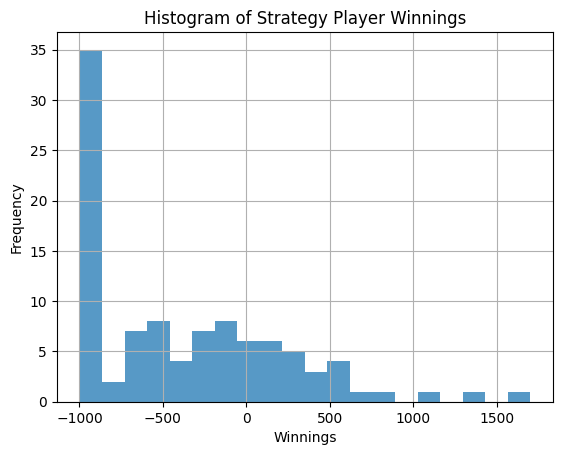

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def test_scenario(num_rounds=50, quiet=True):
    num_players = 4  # 1 CardCountingPlayer, 3 ComputerPlayer
    game = Game(num_players, quiet=quiet)

    for _ in range(num_rounds):
        game.play_round()

    strategy_player = game.players[-1]
    initial_chips = 1000
    winnings = strategy_player.chips - initial_chips

    return winnings  # Return winnings instead of printing

if __name__ == '__main__':
    num_games = 100
    winnings_list = [test_scenario() for _ in range(num_games)]

    # Calculate statistics
    avg_winnings = np.mean(winnings_list)
    std_dev_winnings = np.std(winnings_list)
    prob_win = np.mean(np.array(winnings_list) > 0)
    prob_loss = np.mean(np.array(winnings_list) < 0)

    # Print statistics
    print(f"Average winnings per game: {avg_winnings}")
    print(f"Standard deviation of winnings: {std_dev_winnings}")
    print(f"Probability of net winning after 50 rounds: {prob_win}")
    print(f"Probability of net losing after 50 rounds: {prob_loss}")

    # Plot histogram
    plt.hist(winnings_list, bins=20, alpha=0.75)
    plt.xlabel('Winnings')
    plt.ylabel('Frequency')
    plt.title('Histogram of Strategy Player Winnings')
    plt.grid(True)
    plt.show()

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [32]:
class Game:
    def __init__(self, num_players, quiet=True, threshold=2):
        self.deck = Deck()
        random.shuffle(self.deck.cards)
        self.players = [ComputerPlayer(1000) for _ in range(num_players - 1)] + [CountingPlayer(1000, threshold)]
        self.dealer = ComputerPlayer(0)
        self.hands = {}
        self.shown_cards = []
        self.bets = {}
        self.quiet = quiet

    def play_round(self):
        if self.deck.get_num_cards() < 52:  # If the deck has less than 52 cards, reshuffle
            self.deck = Deck()
            random.shuffle(self.deck.cards)  # Shuffle the deck
            self.shown_cards = []

        self.hands.clear()
        self.shown_cards.clear()
        self.bets.clear()

        for player in self.players:
            bet = player.place_bet()
            self.bets[player] = bet

        for player in self.players + [self.dealer]:
            hand = Hand()
            hand.add_card(self.deck.deal_card())
            hand.add_card(self.deck.deal_card())
            self.hands[player] = hand

        num_decks = max(1, self.deck.get_num_cards() // 52)

        for player in self.players:
            while True:
                decision = player.make_decision(self.hands[player], self.hands[self.dealer].cards[0], self.shown_cards, num_decks)
                if decision == 'h':
                    card = self.deck.deal_card()
                    self.hands[player].add_card(card)
                    self.shown_cards.append(card)
                else:
                    break

        while self.hands[self.dealer].get_score() < 17:
            card = self.deck.deal_card()
            self.hands[self.dealer].add_card(card)
            self.shown_cards.append(card)

        for player in self.players:
            player_hand = self.hands[player]
            dealer_hand = self.hands[self.dealer]
            bet = self.bets[player]

            if player_hand.is_bust():
                if not self.quiet:
                    print(f'{type(player).__name__} busts with {player_hand} and loses {bet} chips')
            elif dealer_hand.is_bust() or player_hand.get_score() > dealer_hand.get_score():
                if not self.quiet:
                    print(f'{type(player).__name__} wins with {player_hand} against dealer {dealer_hand} and wins {bet} chips')
                player.chips += bet * 2
            elif player_hand.get_score() == dealer_hand.get_score():
                if not self.quiet:
                    print(f'{type(player).__name__} pushes with {player_hand} against dealer {dealer_hand}')
                player.chips += bet
            else:
                if not self.quiet:
                    print(f'{type(player).__name__} loses with {player_hand} against dealer {dealer_hand} and loses {bet} chips')

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def test_scenario(threshold, num_rounds=50, quiet=True):
    num_players = 4  # 1 CardCountingPlayer, 3 ComputerPlayer
    game = Game(num_players, quiet=quiet, threshold=threshold)

    for _ in range(num_rounds):
        game.play_round()

    strategy_player = game.players[-1]
    initial_chips = 1000
    winnings = strategy_player.chips - initial_chips

    return winnings

if __name__ == '__main__':
    num_games = 100
    thresholds = [0, 1, 2, 3, 4]  # List of threshold values to try

    threshold_results = {}

    for threshold in thresholds:
        winnings_list = [test_scenario(threshold) for _ in range(num_games)]
        avg_winnings = np.mean(winnings_list)
        threshold_results[threshold] = avg_winnings
        print(f"Threshold: {threshold}, Average winnings per game: {avg_winnings}")

    optimal_threshold = max(threshold_results, key=threshold_results.get)
    print(f"Optimal threshold value: {optimal_threshold}")

Threshold: 0, Average winnings per game: -406.0
Threshold: 1, Average winnings per game: -382.0
Threshold: 2, Average winnings per game: -266.0
Threshold: 3, Average winnings per game: -350.0
Threshold: 4, Average winnings per game: -378.0
Optimal threshold value: 2


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings.

In [34]:
class SimpleCountingPlayer(Player):
    def __init__(self, chips, threshold):
        super().__init__(chips)
        self.running_count = 0
        self.threshold = threshold

    def update_count(self, cards):
        for card in cards:
            if card.rank in ['2', '3', '4', '5', '6']:
                self.running_count += 1
            elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
                self.running_count -= 1

    def place_bet(self):
        if self.running_count > self.threshold:
            return self.chips // 10  # Bet 10% of chips
        else:
            return 10  # Minimum bet

    def play_turn(self, hand, dealer_up_card):
        self.update_count([dealer_up_card])
        return basic_strategy(hand, dealer_up_card)